In [2]:
#example of creating matrices with numpy

import numpy as np
x = np.array([[2.5, 3.2],[0, 1],[2, -3]], dtype=np.float32) #dtype is specifying the format of the elements stored in the matrix
print(x)
print(f"Shape: {x.shape}") #num rows, num cols
print(f"Number of dimensions: {x.ndim}") #it is a matrix with rows and cols, so 2
print(f"Number of elements: {x.size}")


[[ 2.5  3.2]
 [ 0.   1. ]
 [ 2.  -3. ]]
Shape: (3, 2)
Number of dimensions: 2
Number of elements: 6


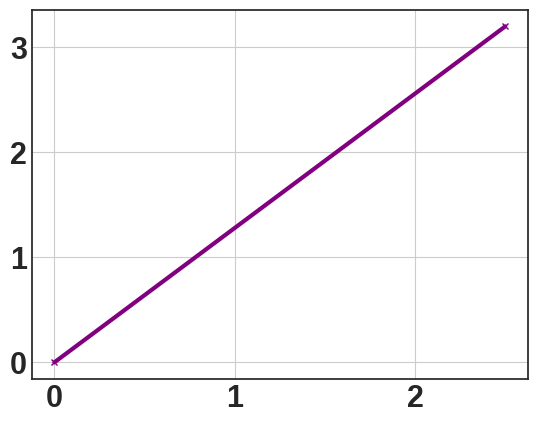

In [31]:
#let's try to plot a vector
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

v = np.array([2.5, 3.2])
plt.plot([0, v[0]],[0, v[1]], 
        marker = 'x', color = 'purple', lw = 3, 
        markersize = 5)  #starting from X, then Y (coordinates)
plt.grid()


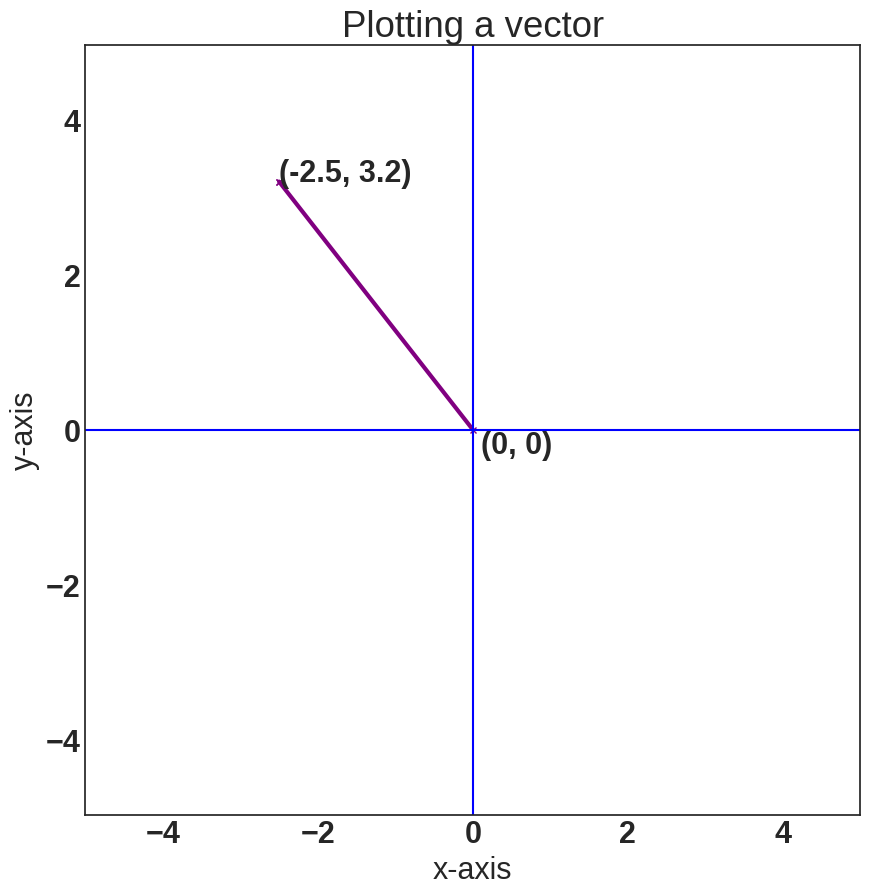

In [32]:
#fancier way to plot the vector v
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  
#above allows plots to be displayed directly in the notebook

v = np.array([-2.5, 3.2])

plt.style.use('seaborn-v0_8-white')
font = { 'family': 'sans-serif',
    'weight': 'bold',
    'size': 22}
matplotlib.rc('font', **font) #set the font properties from the dict

#plotting:
plt.figure(figsize =(10,10)) #size of the image 
plt.plot(v[0], v[1], marker = 'x', color = 'purple', lw = 3, markersize = 5)
#all the X first, then the Y
plt.plot([0, v[0]],[0, v[1]], marker = 'x', color = 'purple', lw = 3, markersize = 5)
#stuff:
plt.axis('equal') #sets the aspect ration of the plot to be equal
#label axes
plt.xlabel('x-axis')
plt.ylabel('y-axis')
#add horizontal and vertical lines through the origin
plt.axhline(0, color = 'blue')
plt.axvline(0, color = 'blue')
#title of the plot
plt.title('Plotting a vector')
#annotate the origin and the point represented by the vector
plt.annotate('(0, 0)', xy=(0, 0), xytext = (.1, -.3))
plt.annotate(f'({v[0]}, {v[1]})', xy =(v[0], v[1]), xytext=(v[0], v[1]))
#limits of the axes
plt.axis([-5, 5, -5, 5])
plt.show()

In [18]:
#diagonal matrix 
import numpy as np
A = np.diag(np.ones(3)) #first creates a vector [1, 1, 1]
                        #and then makes it a diagonal matrix
print(A)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [29]:
#is ID symmetric?
import numpy as np
ID = np.diag(np.ones(3))
#if you don't add np.all() you get a matrix of the checks 
np.all(ID==ID.T) # == does the comparison element-wise
#ID == ID.T


True